In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import klib as kb

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

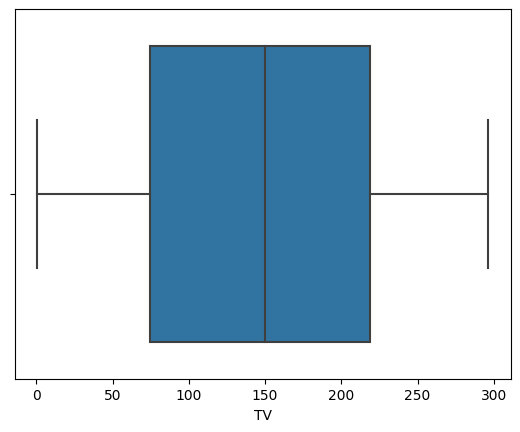

In [8]:
sns.boxplot(x='TV',data=df)
plt.show()

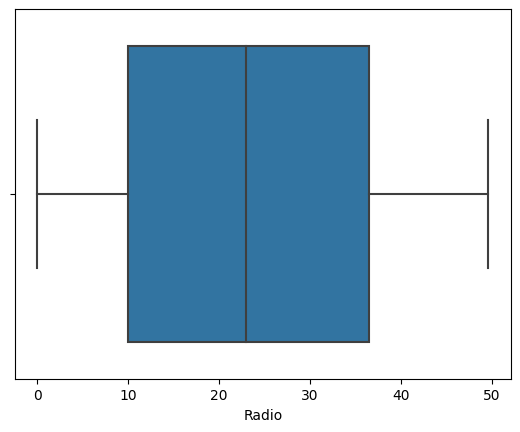

In [10]:
sns.boxplot(x='Radio',data=df)
plt.show()

<AxesSubplot: xlabel='Newspaper'>

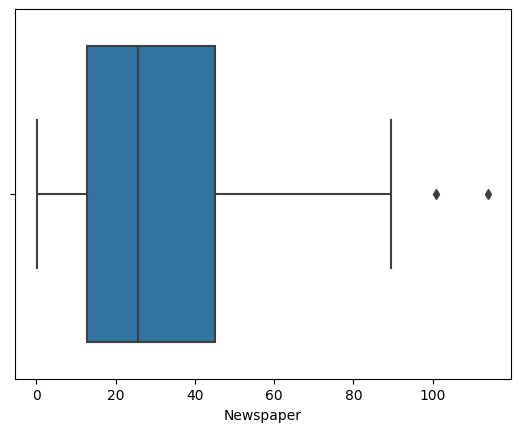

In [11]:
sns.boxplot(x='Newspaper',data=df)

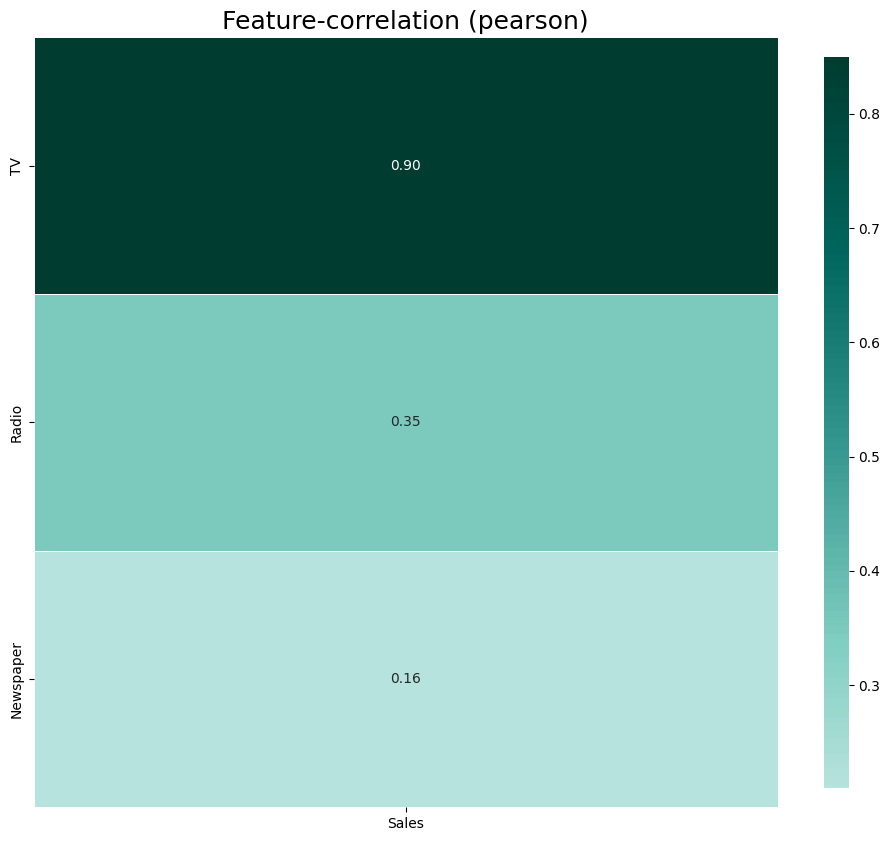

In [12]:
kb.corr_plot(data=df, target='Sales');

In [55]:
x=df[['TV','Radio']].values
x

array([[230.1,  37.8],
       [ 44.5,  39.3],
       [ 17.2,  45.9],
       [151.5,  41.3],
       [180.8,  10.8],
       [  8.7,  48.9],
       [ 57.5,  32.8],
       [120.2,  19.6],
       [  8.6,   2.1],
       [199.8,   2.6],
       [ 66.1,   5.8],
       [214.7,  24. ],
       [ 23.8,  35.1],
       [ 97.5,   7.6],
       [204.1,  32.9],
       [195.4,  47.7],
       [ 67.8,  36.6],
       [281.4,  39.6],
       [ 69.2,  20.5],
       [147.3,  23.9],
       [218.4,  27.7],
       [237.4,   5.1],
       [ 13.2,  15.9],
       [228.3,  16.9],
       [ 62.3,  12.6],
       [262.9,   3.5],
       [142.9,  29.3],
       [240.1,  16.7],
       [248.8,  27.1],
       [ 70.6,  16. ],
       [292.9,  28.3],
       [112.9,  17.4],
       [ 97.2,   1.5],
       [265.6,  20. ],
       [ 95.7,   1.4],
       [290.7,   4.1],
       [266.9,  43.8],
       [ 74.7,  49.4],
       [ 43.1,  26.7],
       [228. ,  37.7],
       [202.5,  22.3],
       [177. ,  33.4],
       [293.6,  27.7],
       [206

In [56]:
y=df[['Sales']].values
y

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [15.6],
       [12.6],
       [17.4],
       [ 9.2],
       [13.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [17.5],
       [ 5.6],
       [20.5],
       [ 9.7],
       [17. ],
       [15. ],
       [20.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [13.2],
       [17.4],
       [11.9],
       [17.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [17.9],
       [ 8.5],
       [16.1],
       [10.6],
       [23.2],
       [19.8],
       [ 9.7],
       [16.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [20.7],
       [14. ],
       [16. ],
       [11.3],
       [11

In [57]:
sc= StandardScaler()

In [58]:
x=sc.fit_transform(x)

In [59]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=1)

In [60]:
model = LinearRegression()

In [61]:
model.fit(x_train,y_train)

LinearRegression()

In [62]:
model.coef_

array([[4.71609681, 1.51911641]])

In [63]:
model.intercept_

array([15.10769403])

In [64]:
training_score = model.score(x_train,y_train)*100  #training
training_score

90.5476269615609

In [65]:
testing_score = model.score(x_test,y_test)*100  #testing
testing_score

87.49222345136187

In [66]:
R2_score = r2_score(y_test, model.predict(x_test))*100
R2_score

87.49222345136187

In [67]:
R2_score

87.49222345136187

In [68]:
y_pred = model.predict(x)

In [69]:
y_pred

array([[21.1726581 ],
       [11.10566294],
       [10.27927402],
       [17.20322878],
       [15.68818633],
       [10.11891354],
       [11.15481869],
       [13.25365773],
       [ 5.31284288],
       [15.89337834],
       [ 8.85885854],
       [18.90904026],
       [ 9.53490891],
       [10.77267117],
       [19.23823355],
       [20.27725776],
       [12.11182169],
       [24.18234952],
       [10.53744271],
       [15.18711281],
       [19.49232837],
       [18.22042384],
       [ 6.98171244],
       [18.92969189],
       [ 9.34711307],
       [19.46056879],
       [15.49871915],
       [19.55899423],
       [21.10488896],
       [10.15294704],
       [23.65653582],
       [12.62598442],
       [10.13043588],
       [21.3017623 ],
       [10.03757434],
       [21.05304061],
       [23.8146647 ],
       [13.80477446],
       [ 9.73610647],
       [21.04675499],
       [18.06281553],
       [17.79714399],
       [23.63353864],
       [16.87931192],
       [ 8.64228319],
       [16

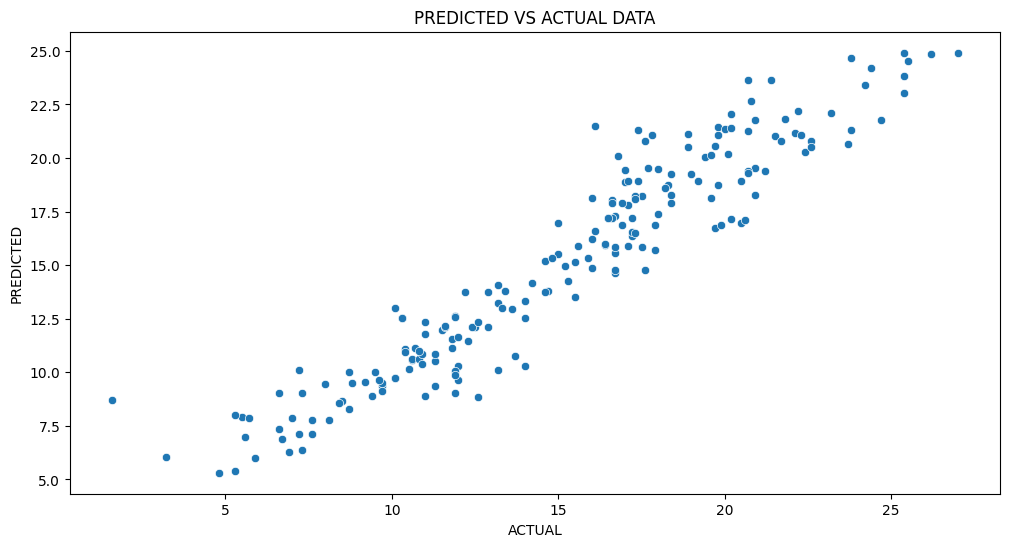

In [73]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");

In [74]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL","PREDICTED"), dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,22.1,21.172658
1,10.4,11.105663
2,12.0,10.279274
3,16.5,17.203229
4,17.9,15.688186


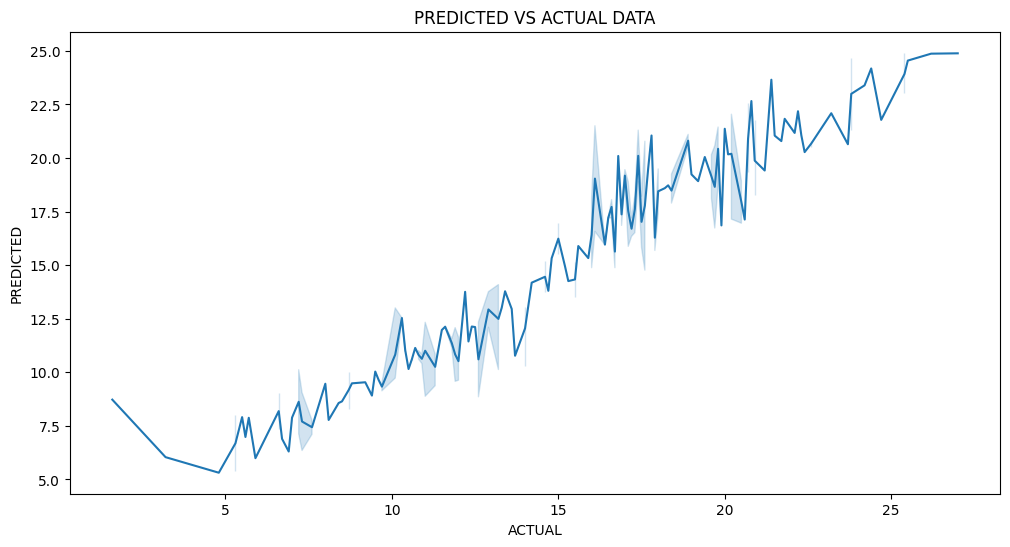

In [75]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");
